In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
df = pd.read_csv("./kc_house_data.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530.0,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310.0,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020.0,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600.0,0,2004,0,98027,47.5345,-122.069,1410,1287


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [99]:
X = df[['bedrooms','sqft_living','sqft_lot','sqft_above','yr_built','price']]
X

,bedrooms,sqft_living,sqft_lot,sqft_above,yr_built,price
0,3,1180,5650,1180.0,1955,221900.0
1,3,2570,7242,2170.0,1951,538000.0
2,2,770,10000,770.0,1933,180000.0
3,4,1960,5000,1050.0,1965,604000.0
4,3,1680,8080,1680.0,1987,510000.0
...,...,...,...,...,...,...
21608,3,1530,1131,1530.0,2009,360000.0
21609,4,2310,5813,2310.0,2014,400000.0
21610,2,1020,1350,1020.0,2009,402101.0
21611,3,1600,2388,1600.0,2004,400000.0


In [100]:
y = df['price'].astype('int32')
y

0        221900
1        538000
2        180000
3        604000
4        510000
          ...  
21608    360000
21609    400000
21610    402101
21611    400000
21612    325000
Name: price, Length: 21613, dtype: int32

In [101]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bedrooms     21613 non-null  int64  
 1   sqft_living  21613 non-null  int64  
 2   sqft_lot     21613 non-null  int64  
 3   sqft_above   21611 non-null  float64
 4   yr_built     21613 non-null  int64  
 5   price        21613 non-null  float64
dtypes: float64(2), int64(4)
memory usage: 1013.2 KB


The number of non-null values for each feature is not the same, i.e., there exist some null values in the "above" feature


Display the null rows

In [102]:
X[X['sqft_above'].isna() == True]

,bedrooms,sqft_living,sqft_lot,sqft_above,yr_built,price
10,3,3560,9796,NaN,1965,662500.0
17,4,1600,4300,NaN,1916,485000.0


Replace null values with mean:


In [103]:
sqft_above_mean = X['sqft_above'].mean().astype('int32')
sqft_above_mean

1788

In [104]:
X.loc[:,'sqft_above'] = X['sqft_above'].fillna(sqft_above_mean)

<ipython-input-104-ff34b38c8cd8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:,'sqft_above'] = X['sqft_above'].fillna(sqft_above_mean)


Now the null values a should be filled: Printing previous null values in sqft_above column

In [105]:
X['sqft_above'].iloc[10]

1788.0

In [106]:
X['sqft_above'].iloc[17]

1788.0

In [107]:
X.head()

,bedrooms,sqft_living,sqft_lot,sqft_above,yr_built,price
0,3,1180,5650,1180.0,1955,221900.0
1,3,2570,7242,2170.0,1951,538000.0
2,2,770,10000,770.0,1933,180000.0
3,4,1960,5000,1050.0,1965,604000.0
4,3,1680,8080,1680.0,1987,510000.0


**Visualization of the features table**
1. Checking data points for each feature

In [108]:
features = X.columns.tolist()
features

['bedrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'yr_built', 'price']

In [109]:
height = X.shape[0]
height

21613

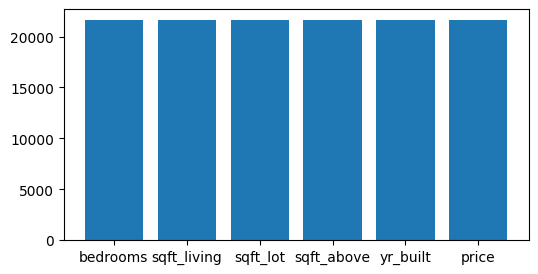

In [110]:
plt.figure(figsize=(6,3))
plt.bar(x=features,height=height)
plt.show()

All the features seem to have the same amount of data points

2. Number of bedrooms in the first 100 data points

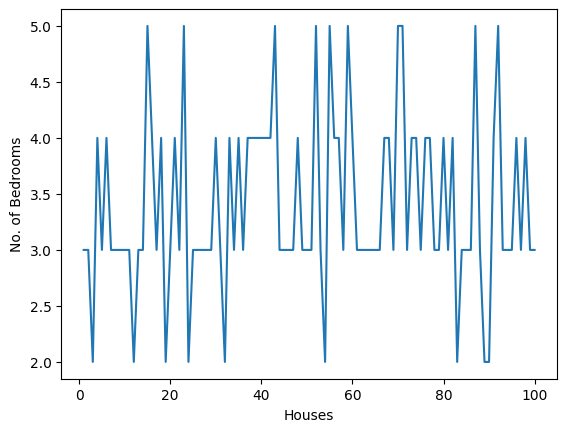

In [111]:
y_values = np.array(X['bedrooms'])[:100]
x_values = X.index[:100].tolist()
x_values = [i+1 for i in range(len(x_values))]
plt.plot(x_values,y_values)
plt.xlabel('Houses')
plt.ylabel('No. of Bedrooms')
plt.show()

For the first 100 houses in the dataset, the maximum number of rooms are 5.
Checking for maximum and minimum number of bedrooms in all the houses

In [112]:
bedroom_array = np.array(X['bedrooms'])
np.min(bedroom_array)

0

In [113]:
np.max(bedroom_array)

33

**Minimum Bedrooms:** 0


**Maximum Bedrooms:** 33

Counting total number of houses with extreme values


In [114]:
# Houses with 0 bedrooms
min_bedroom_outlier = (X['bedrooms'] == 0).sum()
min_bedroom_outlier

13

In [115]:
# Houses with 33 bedrooms
max_bedroom_outlier = (X['bedrooms'] == 33).sum()
max_bedroom_outlier

1

There are 13 houses with no bedrooms and 1 house with 33 bedrooms. This causes skewness in the data

Considering bedrooms with at least 1 room and at more 10 rooms

In [116]:
X[(X['bedrooms'] >=1) & (X['bedrooms'] <= 10)].count()

bedrooms       21598
sqft_living    21598
sqft_lot       21598
sqft_above     21598
yr_built       21598
price          21598
dtype: int64

In [117]:
filtered_X = X[(X['bedrooms'] >=1) & (X['bedrooms'] <= 10)]
filtered_X

,bedrooms,sqft_living,sqft_lot,sqft_above,yr_built,price
0,3,1180,5650,1180.0,1955,221900.0
1,3,2570,7242,2170.0,1951,538000.0
2,2,770,10000,770.0,1933,180000.0
3,4,1960,5000,1050.0,1965,604000.0
4,3,1680,8080,1680.0,1987,510000.0
...,...,...,...,...,...,...
21608,3,1530,1131,1530.0,2009,360000.0
21609,4,2310,5813,2310.0,2014,400000.0
21610,2,1020,1350,1020.0,2009,402101.0
21611,3,1600,2388,1600.0,2004,400000.0


Current count of bedrooms

In [118]:
(filtered_X['bedrooms']).count()

21598

Current shape of dataframe

In [119]:
filtered_X.shape

(21598, 6)

3. Checking correlations between various features and target

- Correlation between living space in square feet and the price

In [167]:
x_sqft_living = np.array(X['sqft_living'][:100])
y_price = np.array(X['price'][:100])

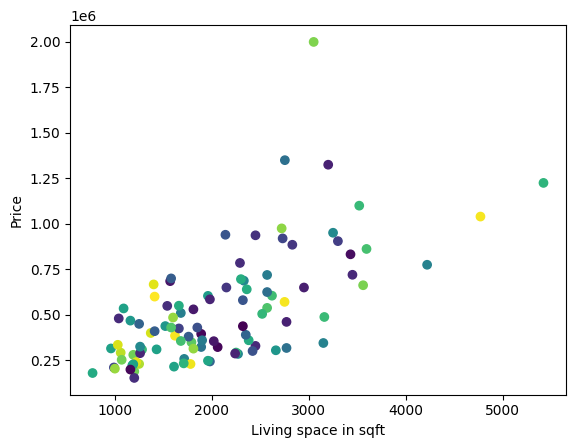

In [176]:
rng = np.random.RandomState(0)
colors = rng.rand(100)
plt.scatter(x_sqft_living, y_price,c=colors)
plt.xlabel('Living space in sqft')
plt.ylabel('Price')
plt.show()

Observing the scatter plot, there seems to be a direct correlation between the two variables, i.e., as the size of living space increases, so do the number of bedrooms

- Correlation between living space in square feet and the price

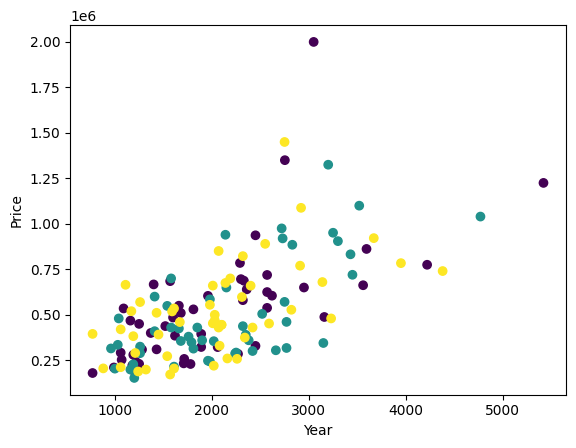

In [177]:
x_year= np.array(X['sqft_living'][:150])
y_price = np.array(X['price'][:150])
iris = load_iris()
plt.scatter(x_year,y_price,c=iris.target)
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

**
Linear Regression**

In [181]:
y = filtered_X['price']
filtered_X = filtered_X.drop(columns=['price'])
filtered_X

,bedrooms,sqft_living,sqft_lot,sqft_above,yr_built
0,3,1180,5650,1180.0,1955
1,3,2570,7242,2170.0,1951
2,2,770,10000,770.0,1933
3,4,1960,5000,1050.0,1965
4,3,1680,8080,1680.0,1987
...,...,...,...,...,...
21608,3,1530,1131,1530.0,2009
21609,4,2310,5813,2310.0,2014
21610,2,1020,1350,1020.0,2009
21611,3,1600,2388,1600.0,2004


In [182]:
# Splitting the dataset
X_train,X_test,y_train,y_test = train_test_split(filtered_X,y,test_size=0.2,random_state=42)

In [187]:
# Printing the shape of datasets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17278, 5)
(4320, 5)
(17278,)
(4320,)


In [188]:
# Train model
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [199]:
predictions = model.predict(X_train)
predictions

array([555913.82945258, 858876.03234088, 375808.77272583, ...,
       511066.11813244, 127497.18089774, 411279.41504001])

In [204]:
predicted_test = model.predict(X_test)
print(predicted_test.astype('int32'))
print(y_test.astype('int32'))

[530201 663250 708967 ... 222983 318670 901811]
17813    744000
21373    325000
10394    405000
12415    230000
15374    340000
          ...  
19475    431200
13702    230000
2523     225000
19162    460000
9410     549900
Name: price, Length: 4320, dtype: int32


In [208]:
### Performance metrics

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, predicted_test)
print(mse)

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)
print(rmse)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, predicted_test)
print(mae)

# Calculate R-squared
r2 = r2_score(y_test, predicted_test)
print(r2)

60073222848.72916
245098.39421899352
161438.93343330614
0.5622355780921637
